In [1]:
import networkx as nx

import pandas as pd 
import numpy as np
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns 
import glob

In [63]:
Data_Folder = "D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook/"
circle = {}
G = {}
i = 0
for file in glob.glob(Data_Folder+"*.edges"):
    print(file.split(".edges")[0])
    var_name ="Ego"+file.split(".edges")[0].split("\\")[-1]
    # fileName = Data_Folder+file
    circle[i] = pd.read_csv(file,low_memory=False, header=None, delimiter=" ")
    print(circle[i].shape)
    G[i] = nx.read_edgelist(file,nodetype=int,create_using=nx.Graph)
    # circle[i].astype(int)
    # circle[i].columns = ['e'+str(c) for c in circle[i].columns]
    # circle[i].index = circle[i].columns

    # G[i] = nx.from_pandas_adjacency(circle[i])
    G[i].name = var_name
    stats = 'Graph '+ var_name +': ' + str(len(G[i].nodes())) + ' nodes, ' + str(len(G[i].edges())) + ' edges'
    print(stats)
    i=i+1
G_cOUNT = len(G)

D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\0
(5038, 2)
Graph Ego0: 333 nodes, 2519 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\107
(53498, 2)
Graph Ego107: 1034 nodes, 26749 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\1684
(28048, 2)
Graph Ego1684: 786 nodes, 14024 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\1912
(60050, 2)
Graph Ego1912: 747 nodes, 30025 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\3437
(9626, 2)
Graph Ego3437: 534 nodes, 4813 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\348
(6384, 2)
Graph Ego348: 224 nodes, 3192 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\3980
(292, 2)
Graph Ego3980: 52 nodes, 146 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\414
(3386, 2)
Graph Ego414: 150 nodes, 1693 edges
D:/Learning/MITx/MITx 6.419x_data_analysis/module_3/facebook\686
(3312, 2)
Graph Ego686: 168 nodes, 1656

# GRaph

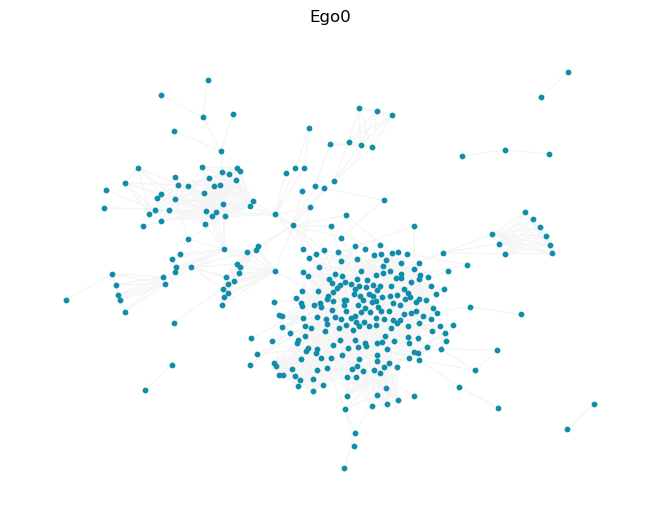

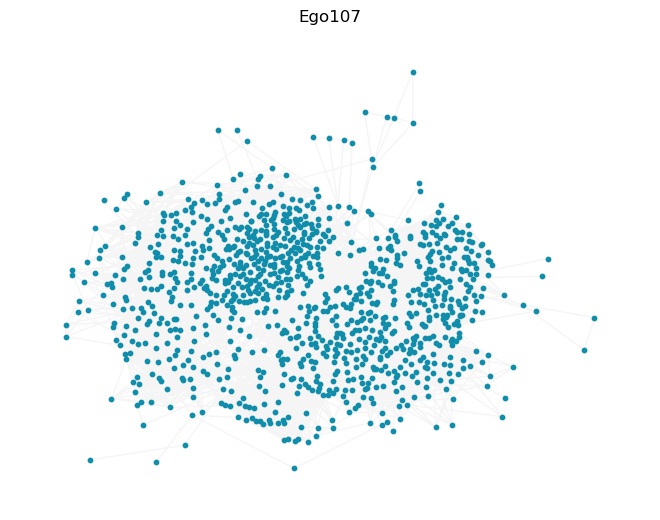

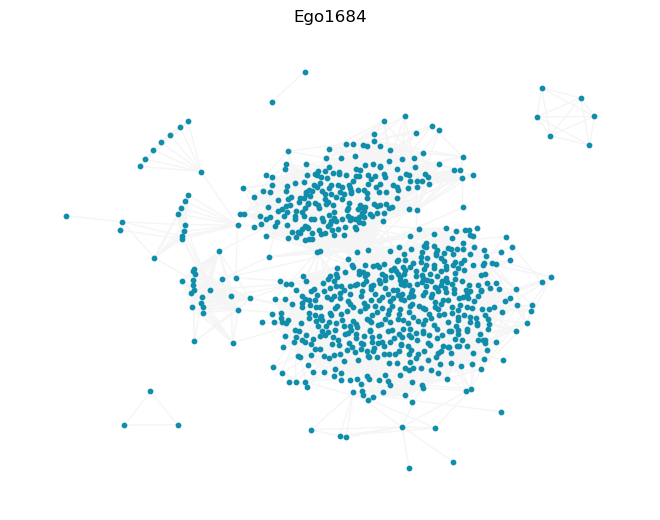

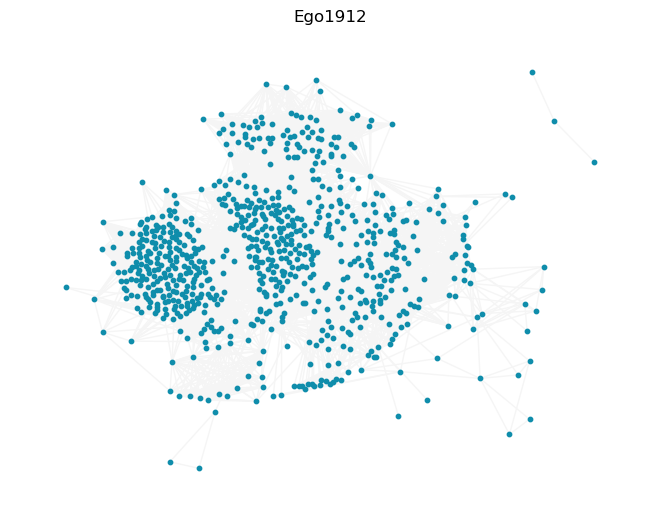

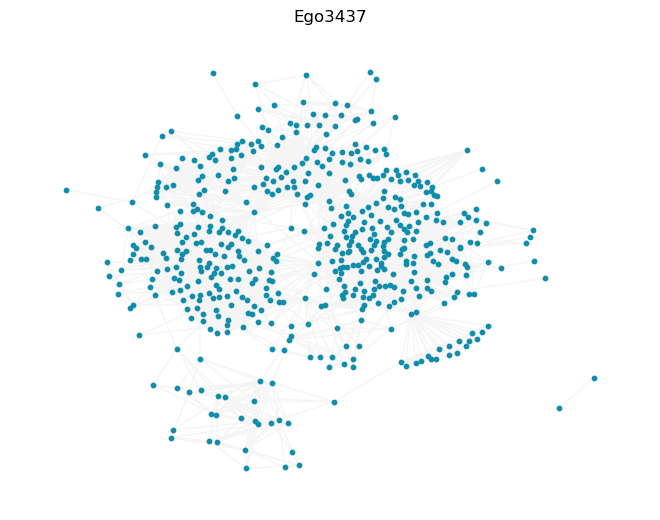

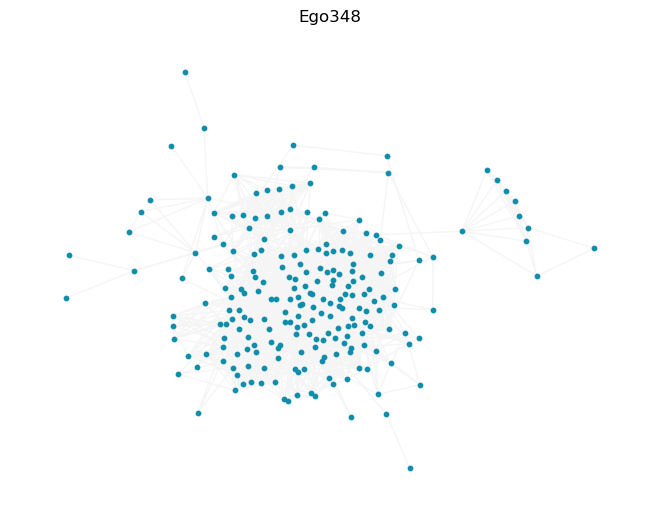

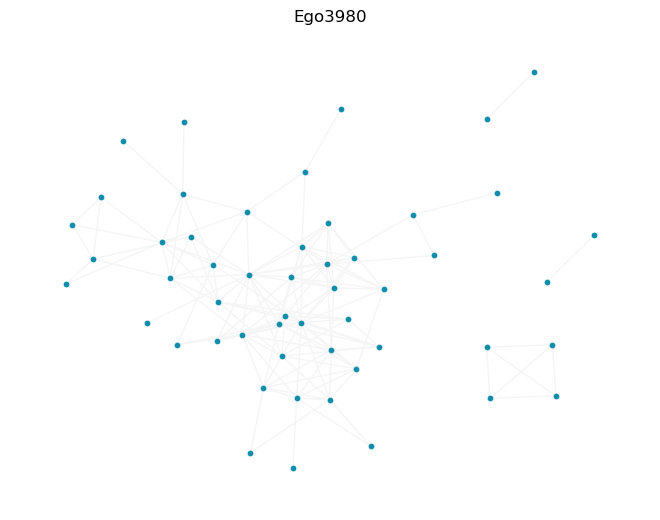

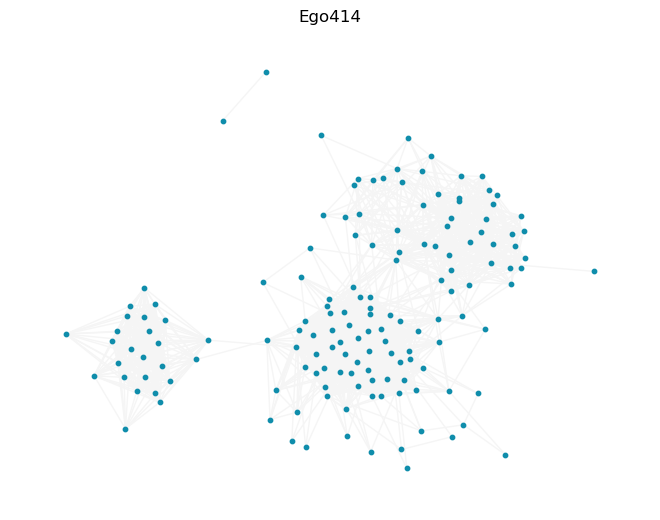

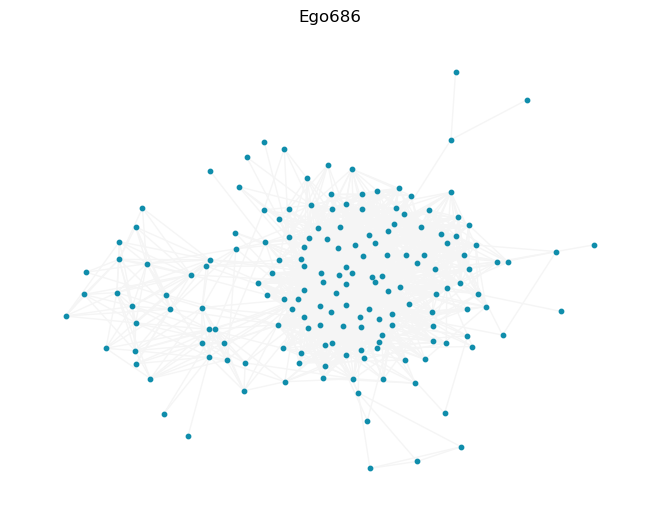

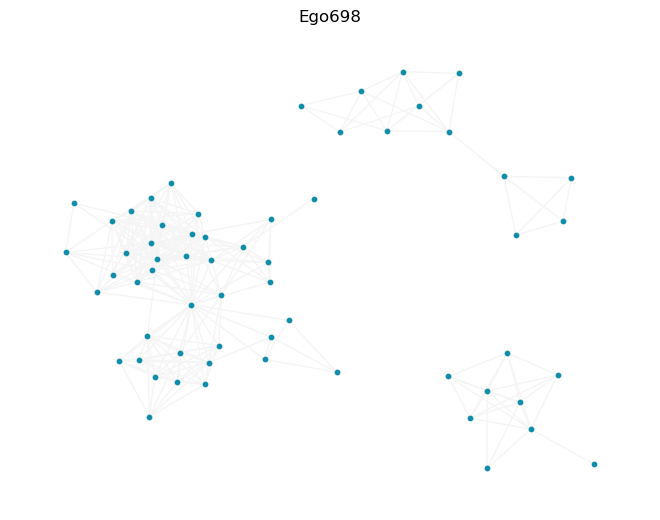

In [67]:
# draw the graph for phase 3
for i in range(G_cOUNT):
    # print(G[i].name)
    nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels=False, node_color = "#0f8dab", node_size=10,edge_color="#f5f5f5") 
    plt.title(G[i].name) 
    plt.show()

In [64]:
for i in range(G_cOUNT):
    degree_sequence =nx.degree_histogram(G[i])
    # print(degree_sequence)
    avg = np.mean(degree_sequence)
    med = np.median(degree_sequence)
    std = np.std(degree_sequence)
    print(G[i].name+": average = " + '{:.5f}'.format(avg) + ", median = " + '{:.5f}'.format(med) + ", standard deviation = " + '{:.5f}'.format(std))

Ego0: average = 4.26923, median = 1.50000, standard deviation = 5.98861
Ego107: average = 4.07087, median = 2.00000, standard deviation = 5.18049
Ego1684: average = 5.73723, median = 4.00000, standard deviation = 5.69065
Ego1912: average = 2.54082, median = 2.00000, standard deviation = 2.77685
Ego3437: average = 4.94444, median = 1.00000, standard deviation = 7.21859
Ego348: average = 2.24000, median = 2.00000, standard deviation = 2.20055
Ego3980: average = 2.73684, median = 2.00000, standard deviation = 2.89904
Ego414: average = 2.58621, median = 2.00000, standard deviation = 2.10938
Ego686: average = 2.15385, median = 1.00000, standard deviation = 2.51190
Ego698: average = 2.03333, median = 1.00000, standard deviation = 2.25807


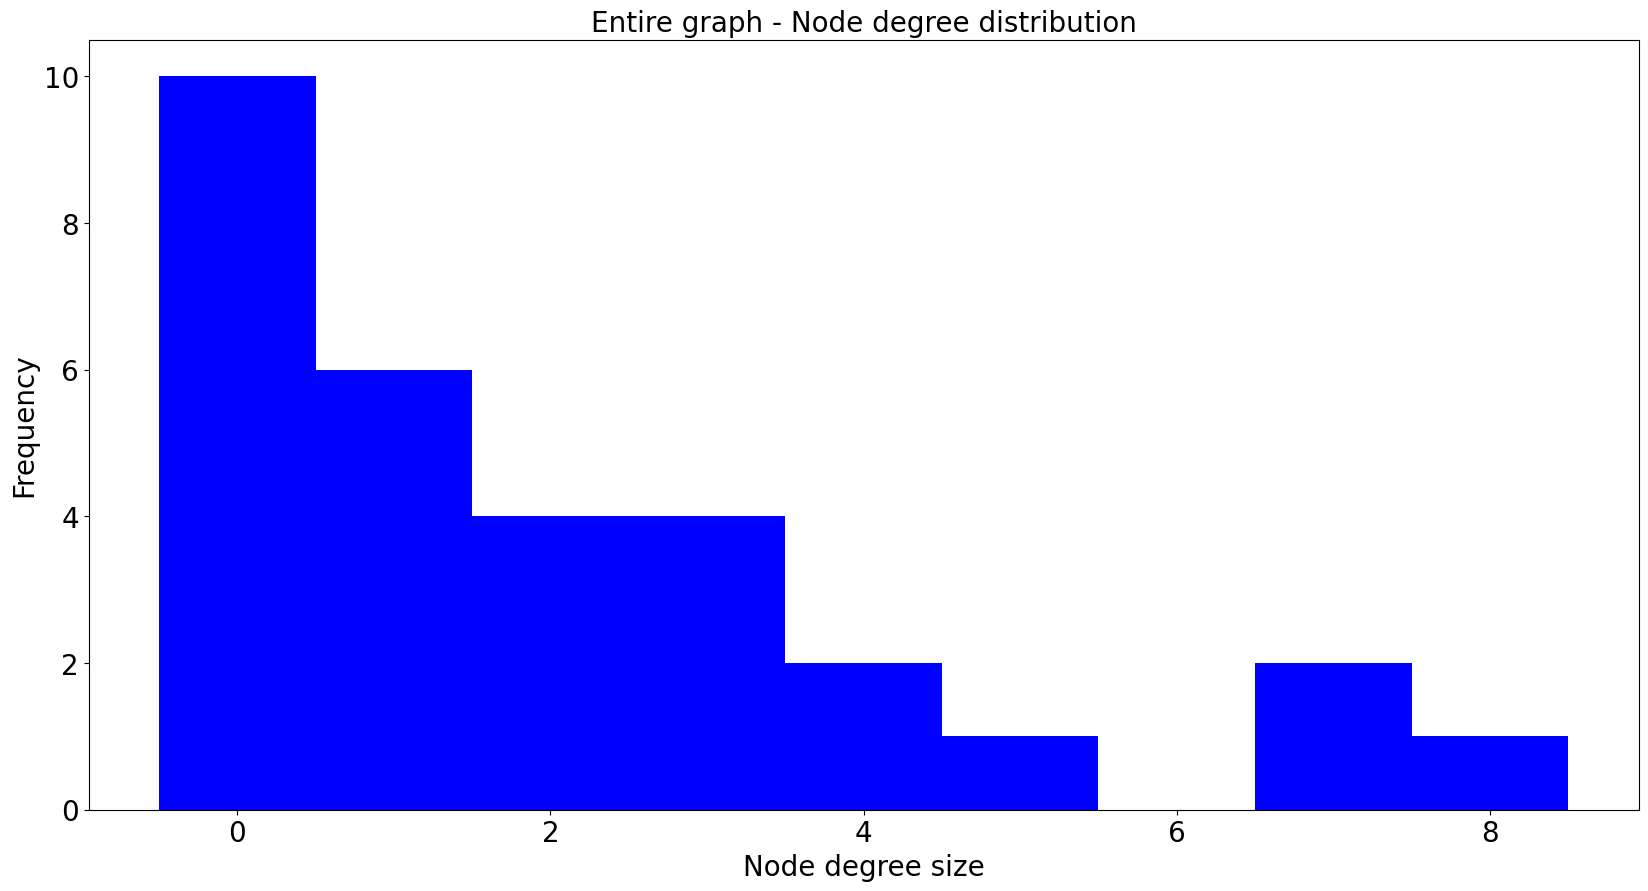

In [66]:
import collections
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution", fontsize=20)
plt.show()

In [70]:
def get_player_avg(function_name="degree_centrality"):
    print(function_name)
    start = time.time()
    player_dgr = {}
    player_avg = []
    for i in range(0,G_cOUNT):
        dgr = nx.degree_centrality(G[i])
        if function_name.lower() == 'betweenness_centrality':
            dgr = nx.betweenness_centrality(G[i])
        elif function_name.lower() == 'eigenvector_centrality':
            dgr = nx.eigenvector_centrality(G[i])
        # print("Phase {}".format(i))
        for d in dgr:
            if d in player_dgr:
                player_dgr[d].append(dgr[d])
            else:
                player_dgr[d]=[0]
    # get the average degree
    for d in player_dgr:
        player_avg.append({'player':d,'avg':np.nanmedian(player_dgr[d])})

    tmp_df = pd.DataFrame(player_avg)
    tmp_df.sort_values('avg', inplace=True, ascending=False)
    end = time.time()
    print("timelapse = ",end - start)
    return tmp_df

# d = get_player_avg("degree_centrality")
# d = get_player_avg("betweenness_centrality")
d = get_player_avg("eigenvector_centrality")
d.head(10)

eigenvector_centrality
timelapse =  1.523057460784912


,player,avg
1169,376,0.164115
395,475,0.147208
373,483,0.140175
3792,747,0.139006
3764,828,0.135281
3789,823,0.130981
683,566,0.129926
3823,856,0.129467
3786,774,0.121516
3782,697,0.120992


Time elapsed to compute hub and authority scores:  0.2792210578918457
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.33277249336242676
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.35884618759155273
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.40918469429016113
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.4252164363861084
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.43314528465270996
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.43314528465270996
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.44129300117492676
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.44129300117492676
<class 'dict'>
<class 'dict'>
Time elapsed to compute hub and authority scores:  0.4492607116699219
<class 'dict'>
<class '

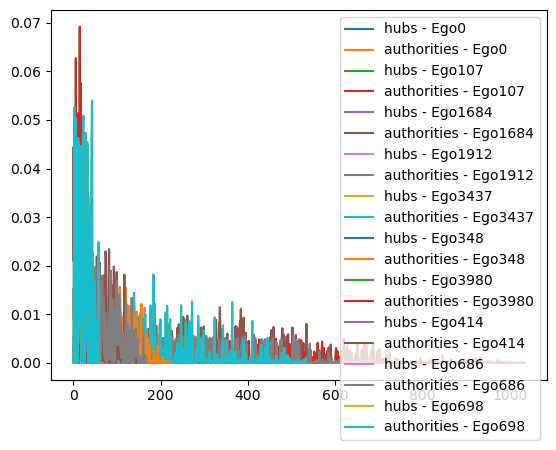

In [73]:
# compute hub/authority scores
t = time.time()
plt.cla()
plt.title("Hubs")
for i in range(G_cOUNT):
    hubs, authorities = nx.hits(G[i])
    elapsed = time.time() - t
    print('Time elapsed to compute hub and authority scores: ', elapsed)
    print(type(hubs))
    print(type(authorities))
    nx.set_node_attributes(G[i], hubs, 'hub')
    nx.set_node_attributes(G[i], authorities, 'authority')
    hubs_visual = np.array(list(hubs.values()))
    plt.plot(hubs_visual, label="hubs - "+G[i].name)
plt.legend()
plt.show()


plt.cla()
plt.title("Authorities")
for i in range(G_cOUNT):
    hubs, authorities = nx.hits(G[i])
    elapsed = time.time() - t
    print('Time elapsed to compute hub and authority scores: ', elapsed)
    print(type(hubs))
    print(type(authorities))
    nx.set_node_attributes(G[i], hubs, 'hub')
    nx.set_node_attributes(G[i], authorities, 'authority')
    authorities_visual = np.array(list(authorities.values()))
    plt.plot(authorities_visual, label=G[i].name)
plt.legend()
plt.show()
